**Part 2 Data Mining By Christian Gauthier**

*I worked and submitted alone*

*Student Number: 33683676*

**Overall Problem:**

Credit risk assessment classification problem to determine if client is to default on credit card payment, with 2 outputs, 1 = Yes and 0 = No. This output is determined using 23 input predictor variables.

Dataset is split into 2 sections, train and test with each section containing 15000 records. Within the train dataset, there contains 11682 records with a Y value of 0 (No) and 3318 values of 1 (Yes). 


**Measure of success:**

To evaluate the success of the models, an assessment will be conducted using a nested K-fold validation system, which will determine their overall accuracy value. This will involve a cross-validated grid search using the entire dataset to identify the best performing hyperparameters of each model. Following this, the tuned model will undergo another K-fold function, where the dataset will be divided into equal size subsets, with one subset used as the validation dataset to generate an accuracy score. These scores will then be compared with the resulting model performances.

**Models being used within study:**

Random Forest, AdaBoost, SVM 

**Data Inspection And Visualisation**

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Read the data
df_train = pd.read_csv('creditdefault_train.csv')
df_test = pd.read_csv('creditdefault_test.csv')

print(df_train.head(3))

   Y     X1  X2  X3  X4  X5  X6  X7  X8  X9  ...    X14    X15    X16    X17  \
0  1  20000   2   2   1  24   2   2  -1  -1  ...    689      0      0      0   
1  0  50000   2   2   1  37   0   0   0   0  ...  49291  28314  28959  29547   
2  0  50000   1   2   1  57  -1   0  -1   0  ...  35835  20940  19146  19131   

    X18    X19    X20   X21   X22   X23  
0     0    689      0     0     0     0  
1  2000   2019   1200  1100  1069  1000  
2  2000  36681  10000  9000   689   679  

[3 rows x 24 columns]


Dataset contains 23 input variables and 1 output variable:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. One tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment 
status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay 
for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

Y: Credit card default payment (Yes = 1, No = 0)

<AxesSubplot: >

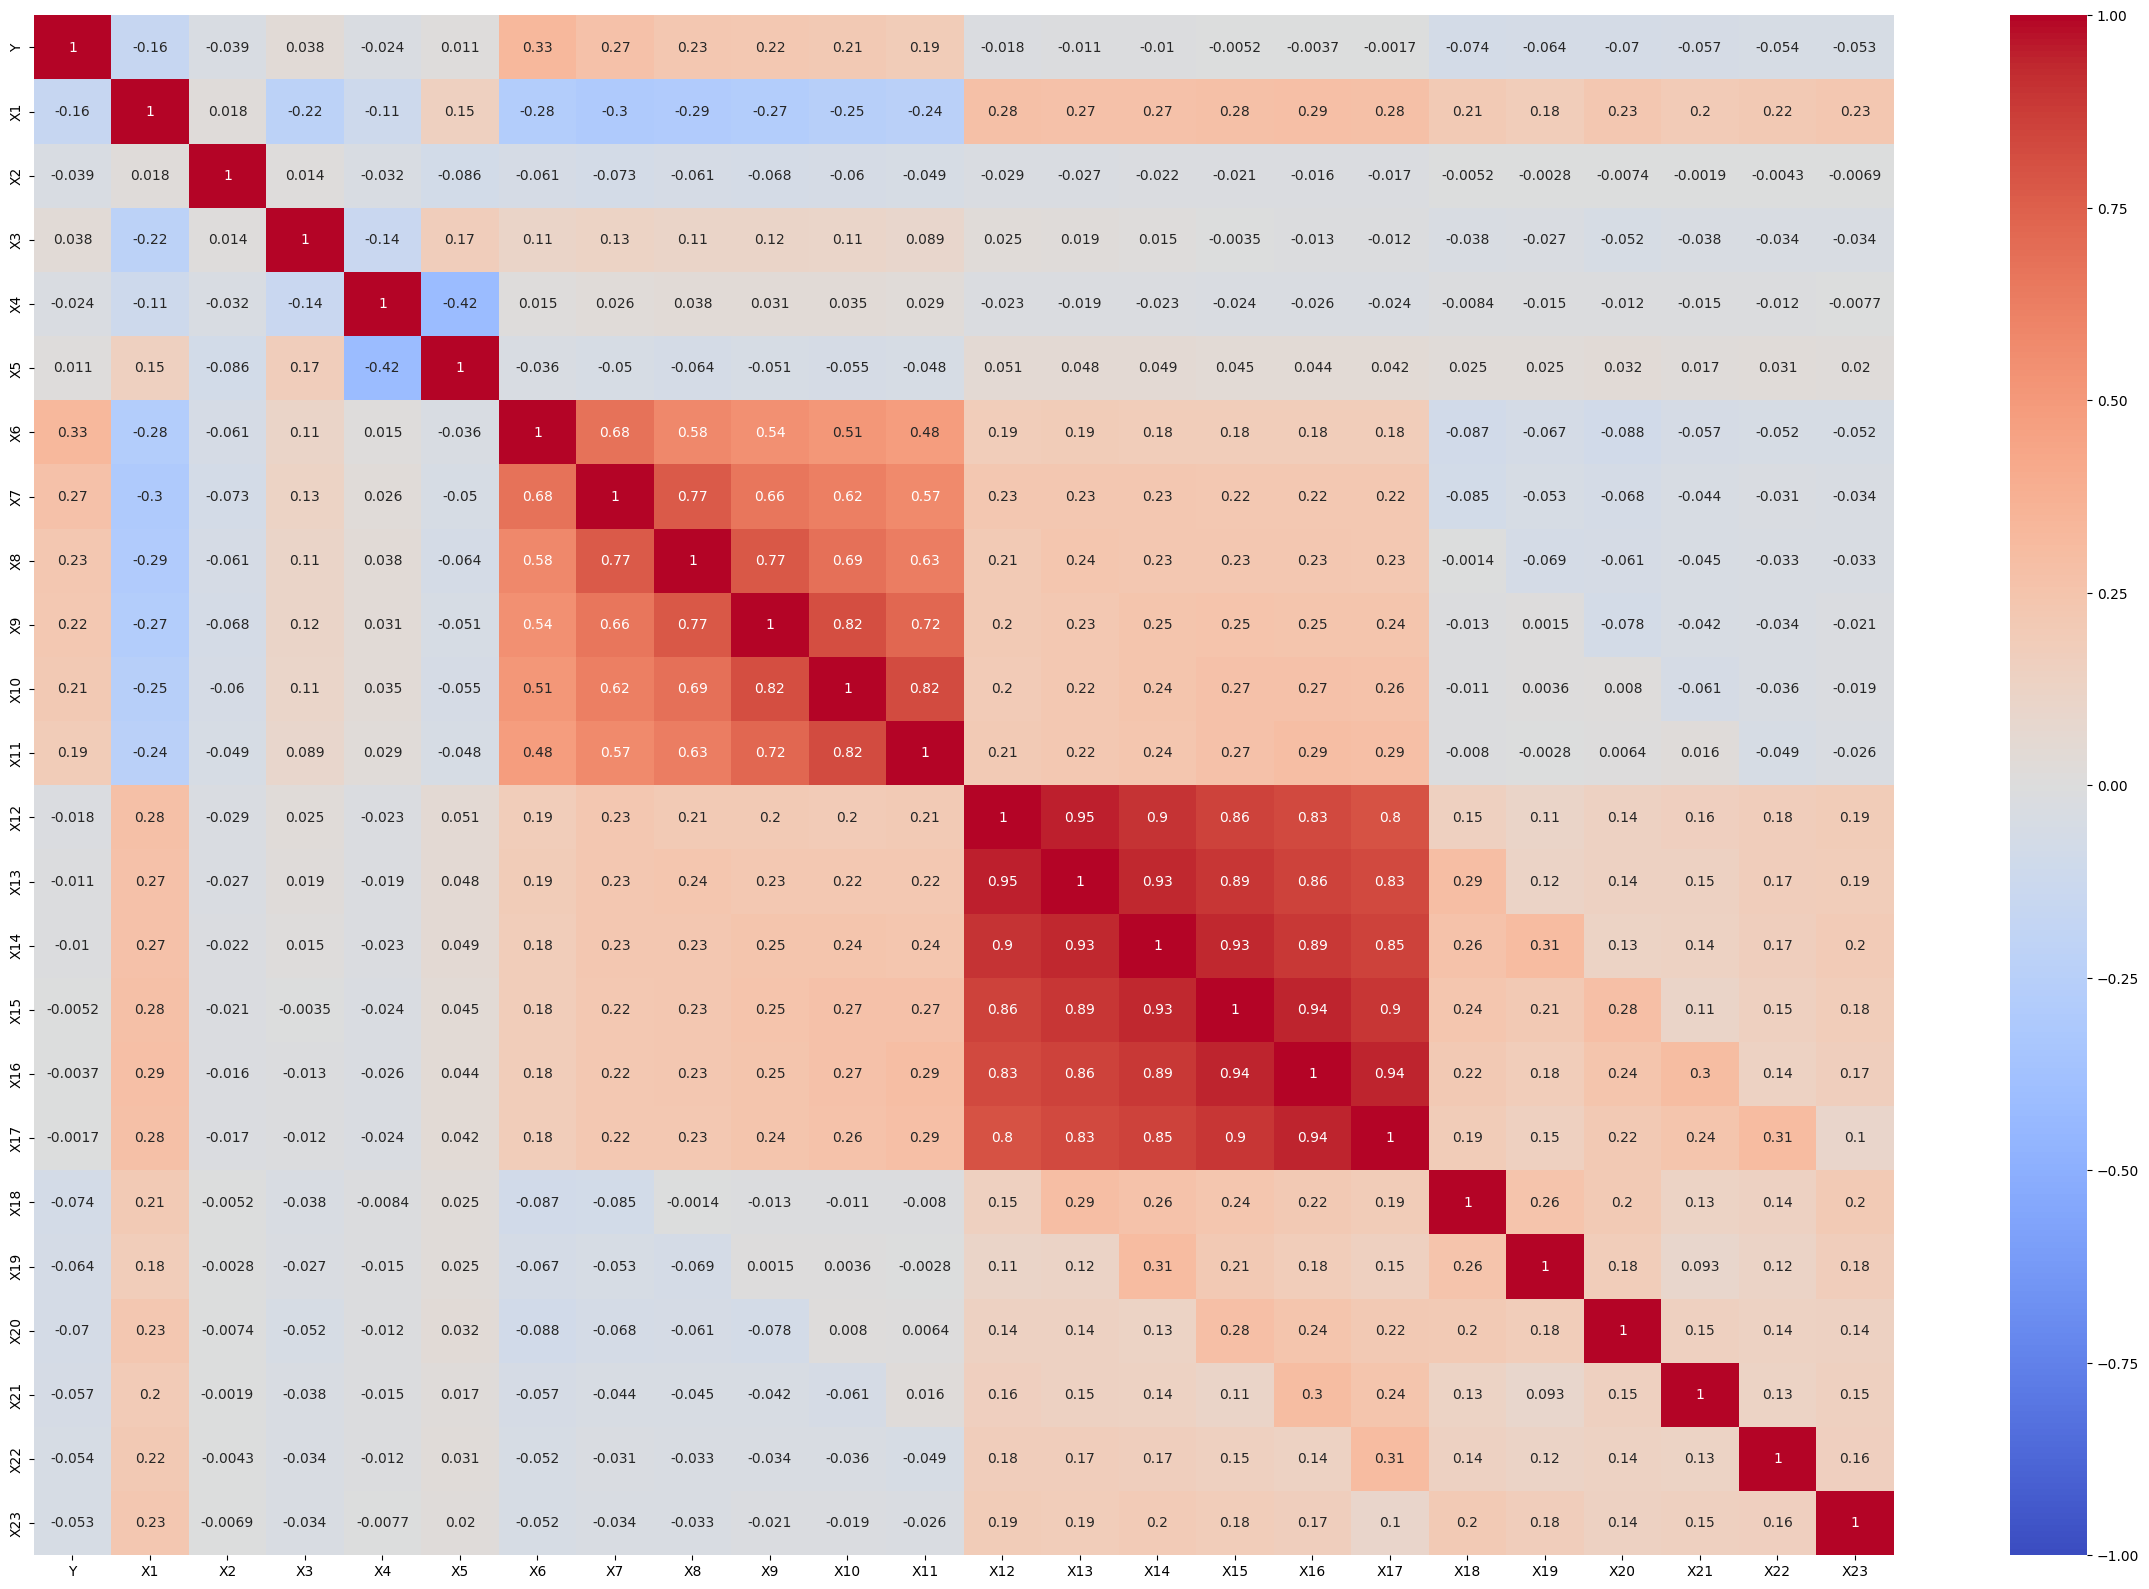

In [3]:
#return a description of the dataframe
df_train.describe() 

#create figure of heatmap
plt.figure(figsize=(30,20)) 
sns.heatmap(df_train.corr(),vmin=-1,vmax=1,cmap="coolwarm",annot=True) #show the data as a heatmap

*Heatmap*

The visualization of correlations between input parameters and output Y is made possible through the use of a heatmap. Red and blue values in the heatmap indicate a stronger correlation with the output compared to values in the greyish zone. The heatmap reveals two major blocks of high correlations, with the first block beginning at X6 and ending at X11, while the second block starts at X12 and ends at X17. In addition to these blocks, there is a larger area of correlation at a lower scale with values around 0.18 - 0.25. Conversely, the lower left and upper right corners of the heatmap display zones with lower correlations, where values surrounding 0 indicate lower importance to the target Y value.

array([[<AxesSubplot: title={'center': 'Y'}>,
        <AxesSubplot: title={'center': 'X1'}>,
        <AxesSubplot: title={'center': 'X2'}>,
        <AxesSubplot: title={'center': 'X3'}>,
        <AxesSubplot: title={'center': 'X4'}>],
       [<AxesSubplot: title={'center': 'X5'}>,
        <AxesSubplot: title={'center': 'X6'}>,
        <AxesSubplot: title={'center': 'X7'}>,
        <AxesSubplot: title={'center': 'X8'}>,
        <AxesSubplot: title={'center': 'X9'}>],
       [<AxesSubplot: title={'center': 'X10'}>,
        <AxesSubplot: title={'center': 'X11'}>,
        <AxesSubplot: title={'center': 'X12'}>,
        <AxesSubplot: title={'center': 'X13'}>,
        <AxesSubplot: title={'center': 'X14'}>],
       [<AxesSubplot: title={'center': 'X15'}>,
        <AxesSubplot: title={'center': 'X16'}>,
        <AxesSubplot: title={'center': 'X17'}>,
        <AxesSubplot: title={'center': 'X18'}>,
        <AxesSubplot: title={'center': 'X19'}>],
       [<AxesSubplot: title={'center': 'X20'}>,

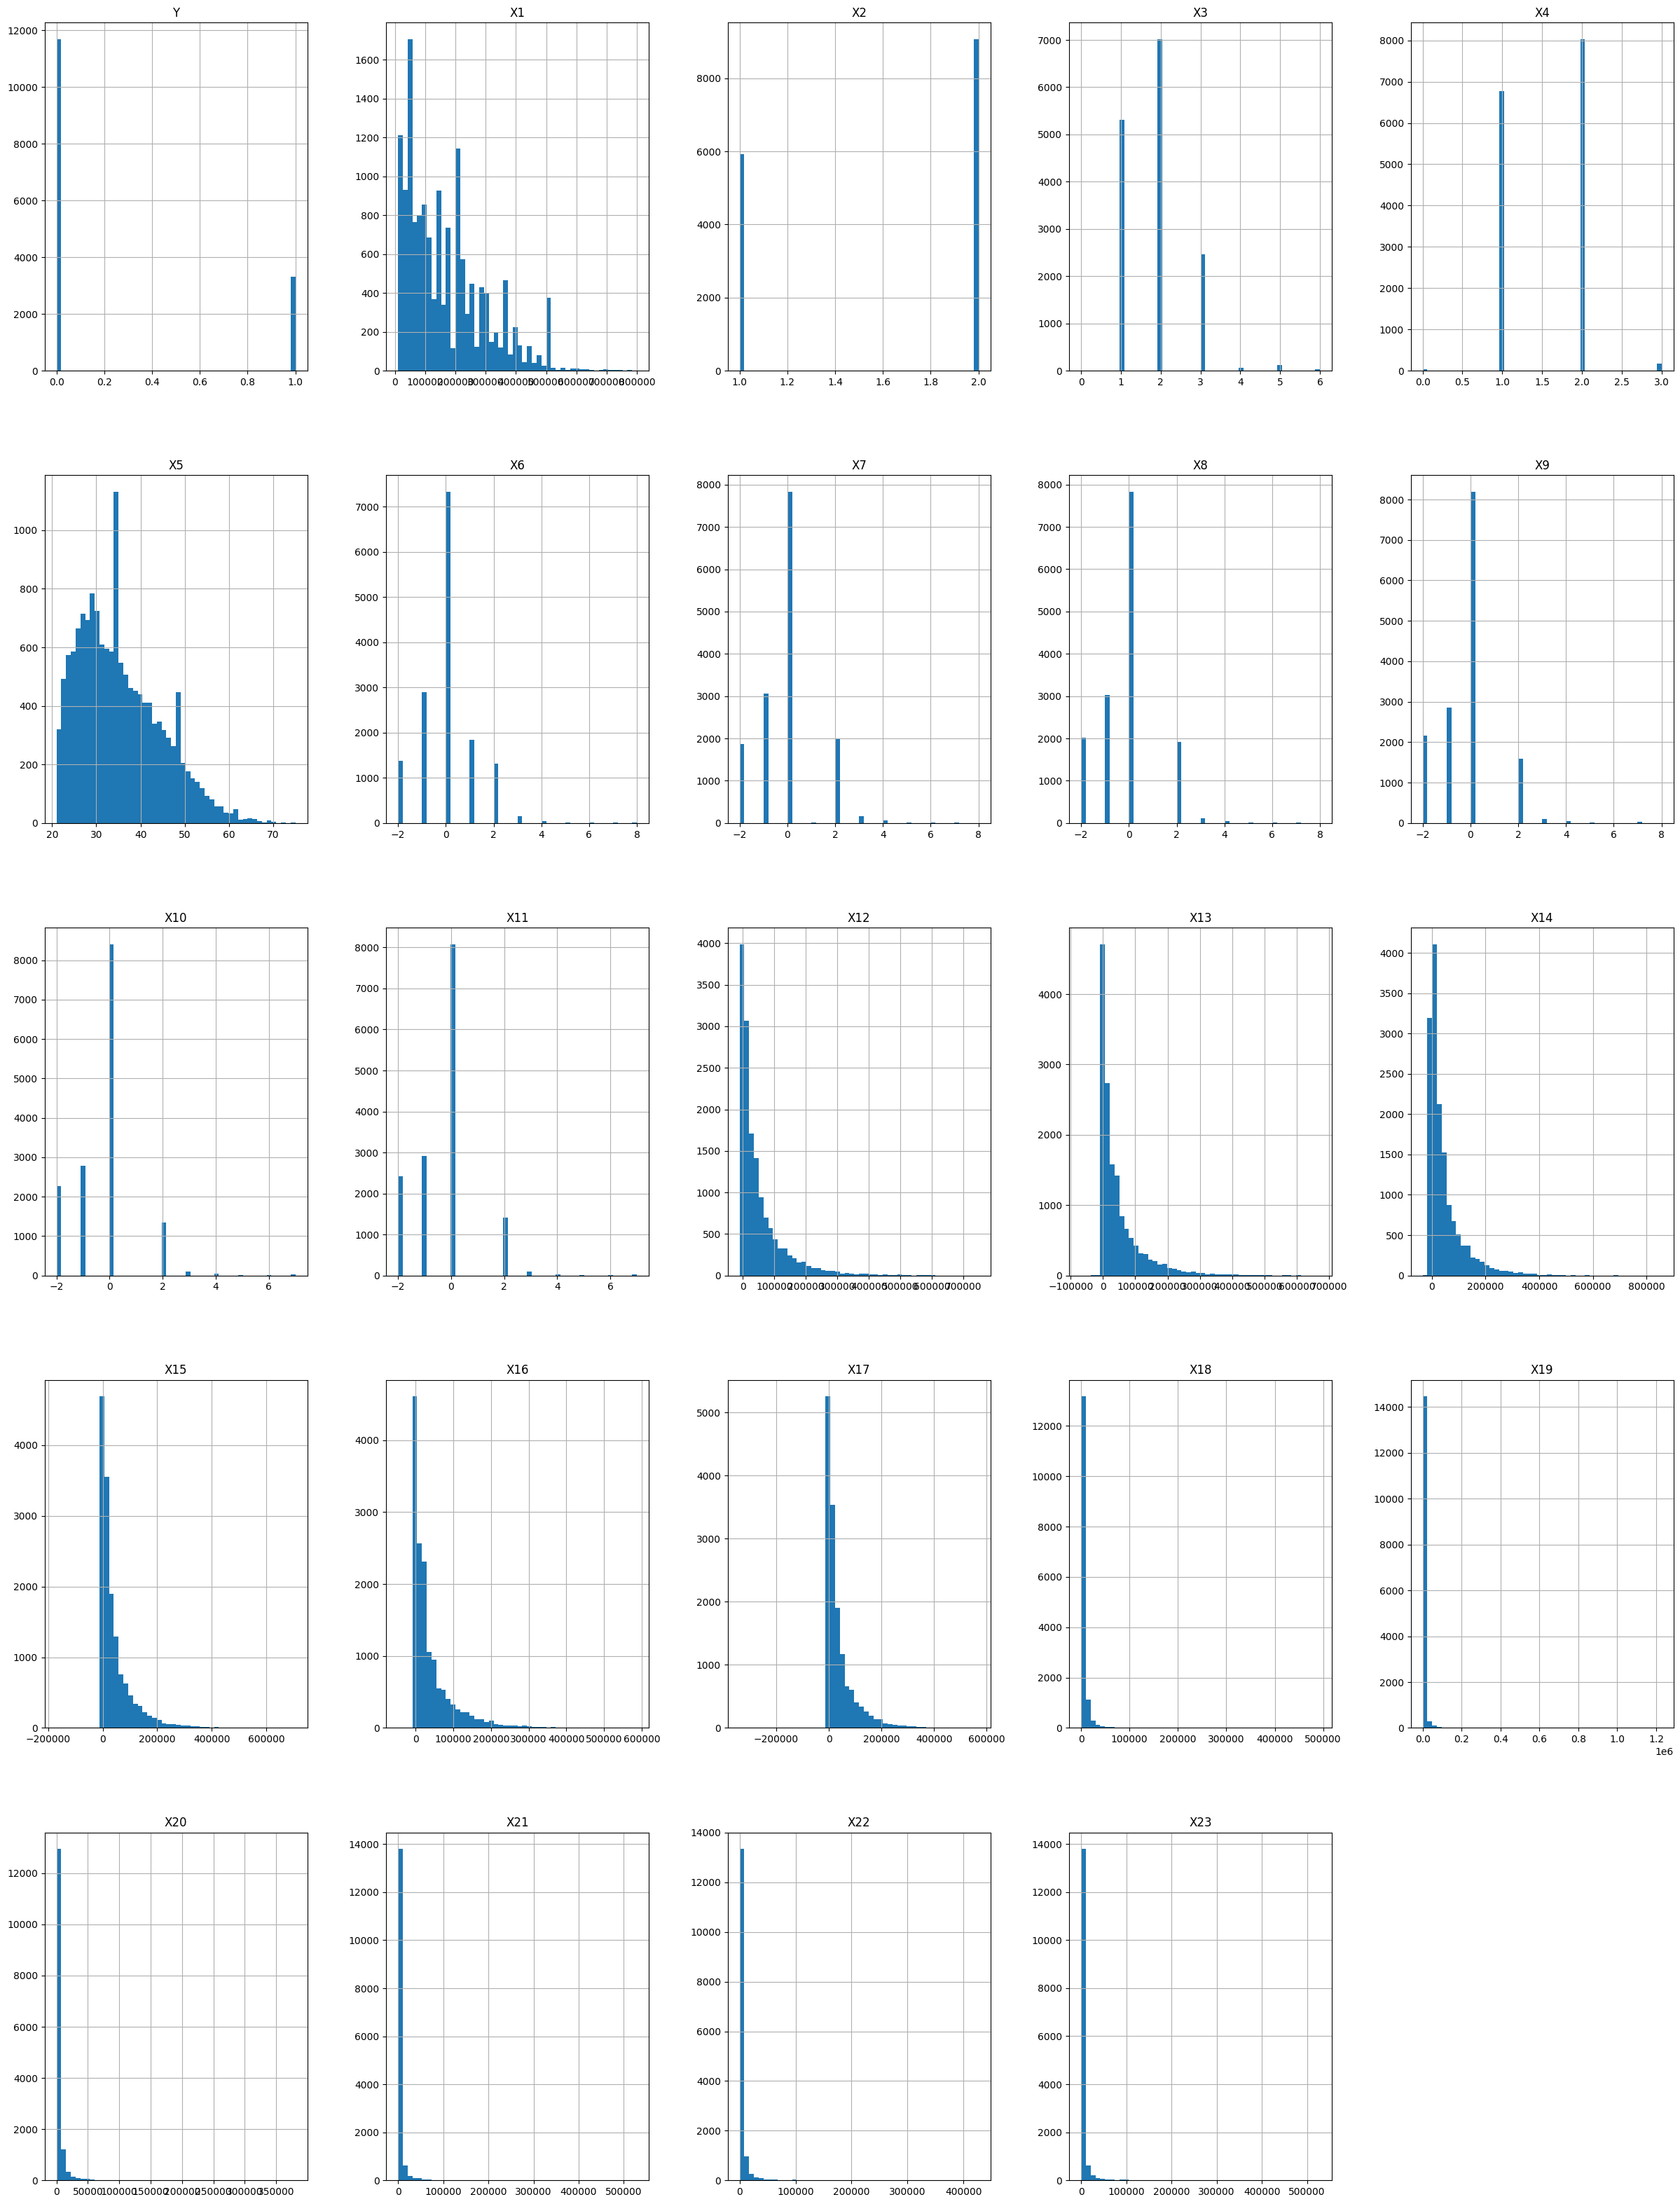

In [3]:
df_train.hist(bins=50,figsize=(30,40))

*Histogram*

The histogram is a graphical representation that offers valuable insight into the data distribution for each variable. Analysis of the dataset indicates a clear distribution pattern starting from 0 onwards for continuous variables (primarily X12 onward), with a steep drop-off as the X values increase on each corresponding graph. This observation is logical, given that the values represent bill statements and previous payment amounts, where larger values indicate higher income. Conversely, values between X6 and X11 (history of past payment) demonstrate a centered distribution, with the highest value of each found in the center of its respective X values.

0    11682
1     3318
Name: Y, dtype: int64


<AxesSubplot: xlabel='Y', ylabel='count'>

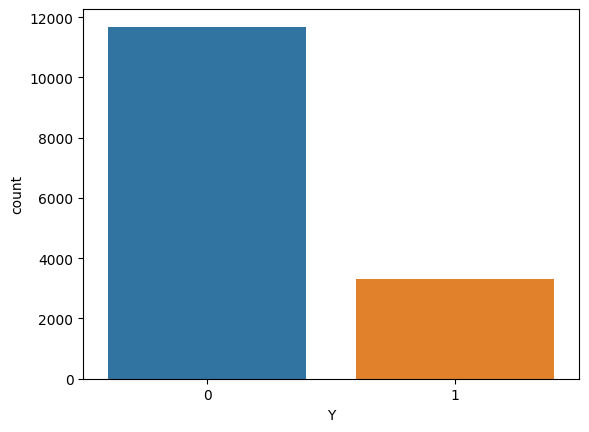

In [2]:
#Get total Y values
print(df_train['Y'].value_counts())

#plot Y counts
sns.countplot(x='Y', data=df_train)

**Data Pre-Processing**

In [3]:
#Seperate the predictors and labels 
x_train = df_train.iloc[:, 1:]
y_train = df_train.iloc[:, 0]

x_test = df_test.iloc[:, 1:]
y_test = df_test.iloc[:, 0]

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(15000, 23)
(15000,)
(15000, 23)
(15000,)


*Scale The Data*

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

#Select numerical features in the predictors
numeric_features = ['X1','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']
numeric_transformer = Pipeline([
    ('std_scaler', StandardScaler())
])

#Select categorical features
ordinal_features = ['X2','X3','X4']
ordinal_transformer = OrdinalEncoder()

#Combine into a column transformation on whole groups within dataset
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("ord", ordinal_transformer, ordinal_features)
    ]
)

#Apply the transformations based on the train dataset
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

**Model Training And Optimisation**

Now that the data has been processed and is ready for use within the models. The models being used within this study will be Random Forest, AdaBoost and SVM. Models will be ran through a Kfold validation method in which the average accuracy is recorded. The model with highest accuracy and overall classification scores will move to the final stage of having access to the test dataset to see the overall performance on unseen data. 

Hyperparameter tuning will be done via a gridsearch cross-validation method where all parameter configurations are attempted. 

In [6]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

def kfolder(modeltype):
    K = 4
    num_val_samples = len(x_train) // K
    all_scores = []

    for i in range(K):
        print('processing fold', i)
        
        # Prepare the validation data: data from partition i
        a, b = i * num_val_samples, (i + 1) * num_val_samples
        val_data = x_train[a : b]
        val_targets = y_train[a : b]
        
        # Prepare the training data: data from all other partitions
        partial_train_data = np.concatenate([x_train[:a], x_train[b:]], axis=0)
        partial_train_targets = np.concatenate([y_train[:a], y_train[b:]], axis=0)
        
        
        # Fit the classifier to the training data
        modeltype.fit(partial_train_data, partial_train_targets)

        # Make predictions on the test data
        y_pred = modeltype.predict(val_data)
        all_scores.append(accuracy_score(y_pred,val_targets))
    return all_scores

**Random Forrest Classification**

A large number of individual decision trees that operate together within an ensemble in order to achieve a higher accuracy. Each tree in the forest gives a class prediction and the overall majority is selected 

In [25]:
from sklearn.ensemble import RandomForestClassifier

#Define classifier
rf = RandomForestClassifier(random_state=14)

#Run basic model through kfold
rf_results = kfolder(rf)

#Average accuracy of model
print('Kfold accuracy results: ' + str(rf_results))
print('Mean Kfold accuracy: ' + str(np.mean(rf_results)))

processing fold 0
processing fold 1
processing fold 2
processing fold 3
Kfold accuracy results: [0.8056, 0.8082666666666667, 0.8229333333333333, 0.8277333333333333]
Mean Kfold accuracy: 0.8161333333333333


In [33]:
#Create hyperparam grid
param_grid_rf = { 
    'n_estimators': [200,300,400,500,600],
    'max_features': ['sqrt','int','log2','none'],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

#Create scoring function 
scorer = make_scorer(accuracy_score, greater_is_better=True)

In [34]:
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=KFold(n_splits=4), scoring=scorer, verbose=1)
CV_rfc.fit(x_train,y_train)

Fitting 4 folds for each of 280 candidates, totalling 1120 fits


c:\Users\Christian Gauthier\miniconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
560 fits failed out of a total of 1120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
560 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Christian Gauthier\miniconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Christian Gauthier\miniconda3\envs\tf\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "c:\Users\Christian Gauthier\miniconda3\envs\tf\lib\site-packages\joblib\parallel.py", line 1085, in __call__
   

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=14),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'int', 'log2', 'none'],
                         'n_estimators': [200, 300, 400, 500, 600]},
             scoring=make_scorer(accuracy_score), verbose=1)

In [35]:
#Print best parameters
print('Best hyperparameters:', CV_rfc.best_params_)
print('Best mean accuracy:', np.abs(CV_rfc.best_score_))

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 500}
Best mean accuracy: 0.8219333333333334


In [41]:
#Create a test for n_estimators 
def randomForestTester():
    results_table = []
    for i in range(1,11):
        best_rf = RandomForestClassifier(n_estimators=100*i,criterion="entropy",max_depth=9,max_features="sqrt")
        rf_results_best = kfolder(best_rf)
        results_table.append(np.mean(rf_results_best))
    return results_table

In [42]:
rf_test_results = randomForestTester()

processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3


In [43]:
print(rf_test_results)

[0.8209333333333333, 0.8208, 0.8202666666666667, 0.8211333333333334, 0.8218000000000001, 0.8224666666666667, 0.821, 0.8213333333333332, 0.8208, 0.8211999999999999]


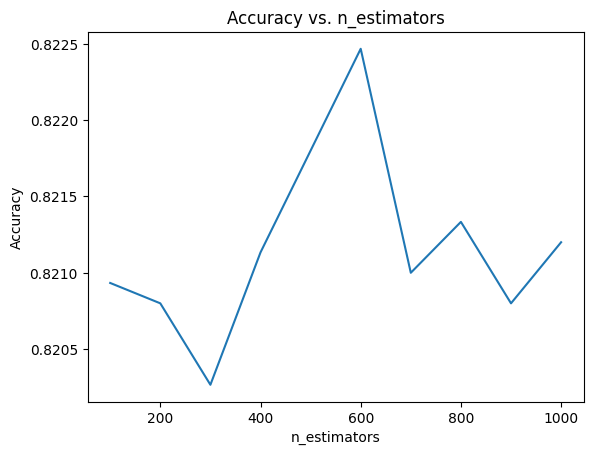

In [44]:
#Create array of n_estimators labels
n_estimators = np.arange(100, 1001, 100)

#Line plot
plt.plot(n_estimators, rf_test_results)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. n_estimators')
plt.show()

In [13]:
#Mean average over K-Fold
print(np.mean(all_scores))

0.8195234708392602


**AdaBoost**

In [45]:
from sklearn.ensemble import AdaBoostClassifier

#Define classifier
ada = AdaBoostClassifier(random_state=14)

#Run basic model through kfold
ada_results = kfolder(ada)

#Average accuracy of model
print('Kfold accuracy results: ' + str(ada_results))
print('Mean Kfold accuracy: ' + str(np.mean(ada_results)))

processing fold 0
processing fold 1
processing fold 2
processing fold 3
Kfold accuracy results: [0.8117333333333333, 0.812, 0.8210666666666666, 0.8341333333333333]
Mean Kfold accuracy: 0.8197333333333333


In [52]:
#Create hyperparam grid
param_grid_ada = {
    'n_estimators': [200,300,400,500,600,700],
    'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.1,0.25,0.5,1]
}

#Create searcher
CV_ada = GridSearchCV(ada, param_grid=param_grid_ada, cv=KFold(n_splits=4),scoring='accuracy',verbose=1)

In [53]:
CV_ada.fit(x_train,y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=AdaBoostClassifier(random_state=14),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1,
                                           0.25, 0.5, 1],
                         'n_estimators': [200, 300, 400, 500, 600, 700]},
             scoring='accuracy', verbose=1)

In [54]:
#Print best parameters
print('Best hyperparameters:', CV_ada.best_params_)
print('Best mean accuracy:', np.abs(CV_ada.best_score_))

Best hyperparameters: {'learning_rate': 0.01, 'n_estimators': 200}
Best mean accuracy: 0.8208


In [56]:
#Create a test for n_estimators 
def adaTester():
    results_table = []
    for i in range(1,11):
        best_ada = AdaBoostClassifier(n_estimators=50*i,learning_rate=0.01)
        ada_results_best = kfolder(best_ada)
        results_table.append(np.mean(ada_results_best))
    return results_table

In [57]:
ada_test_results = adaTester()

processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3


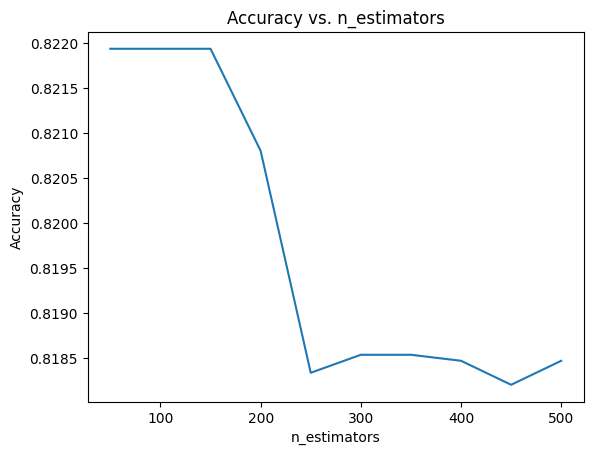

In [58]:
#Create array of n_estimators labels
n_estimators = np.arange(50, 501, 50)

#Line plot
plt.plot(n_estimators, ada_test_results)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. n_estimators')
plt.show()

**SVM**

In [9]:
from sklearn.svm import SVC

#Define classifier
svc = SVC(random_state=14)

#Run basic model through kfold
svc_results = kfolder(svc)

#Average accuracy of model
print('Kfold accuracy results: ' + str(svc_results))
print('Mean Kfold accuracy: ' + str(np.mean(svc_results)))

processing fold 0
processing fold 1
processing fold 2
processing fold 3
Kfold accuracy results: [0.8056, 0.8122666666666667, 0.8218666666666666, 0.832]
Mean Kfold accuracy: 0.8179333333333333


In [11]:
#Create hyperparam grid
param_grid_svc = {
    'C': [0.1, 0.25, 0.5, 0.75, 1, 2],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

#Create searcher
CV_svc = GridSearchCV(svc, param_grid=param_grid_svc, cv=KFold(n_splits=4),scoring='accuracy',verbose=1)

In [12]:
CV_svc.fit(x_train,y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=SVC(random_state=14),
             param_grid={'C': [0.1, 0.25, 0.5, 0.75, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [14]:
#Print best parameters
print('Best hyperparameters:', CV_svc.best_params_)
print('Best mean accuracy:', np.abs(CV_svc.best_score_))

Best hyperparameters: {'C': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best mean accuracy: 0.8187333333333333


In [15]:
#Create a test for n_estimators 
def svcTester():
    results_table = []
    for i in range(1,11):
        best_svc = SVC(C=0.4*i,gamma='auto',kernel='rbf')
        svc_results_best = kfolder(best_svc)
        results_table.append(np.mean(svc_results_best))
    return results_table

In [16]:
svc_test_results = svcTester()

processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3
processing fold 0
processing fold 1
processing fold 2
processing fold 3


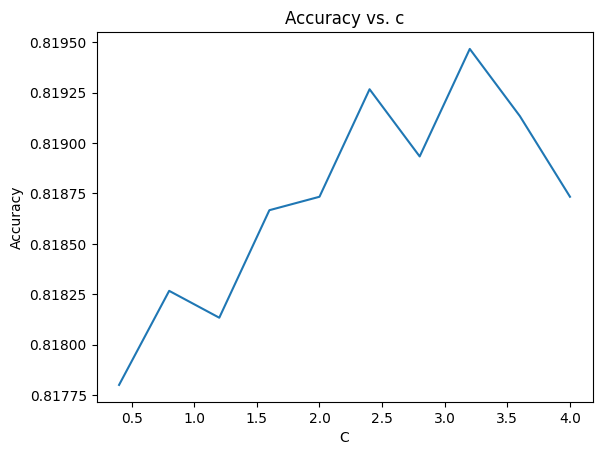

In [18]:
#Create array of n_estimators labels
n_estimators = np.arange(0.4, 4.1, 0.4)

#Line plot
plt.plot(n_estimators, svc_test_results)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. c')
plt.show()

**Best Model Analysis**

TALK ABOUT WHAT BEST PARAMETERS HERE FROM THE CHARTS AND SHIT

THEN MAKE 3 NEW BEST MODELS, THEN FIND BEST 1, THEN RUN IT BACK TURBO ON THE TEST 
